# DS7333 Case Study 2
## Predicting Hospital Readmittance Utilizing Logistic Regression Models

#### John Girard, Shijo Joseph, Douglas Yip

Installing and setting up flake8 

In [1]:
# if you do not have flake8 installed
# then uncomment the pip line below and run it.

# pip install flake8 pycodestyle_magic

In [2]:
#%load_ext pycodestyle_magic
#%pycodestyle_on

#### Objective

Your case study is to build a classifier using logistic regression to predict hospital readmittance. There is missing data that must be imputed. Once again, discuss variable importances as part of your submission..

In [3]:
# Importing Libraries that will be used to
# ingest data and complete our regression
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from copy import deepcopy
%matplotlib inline
get_ipython().run_line_magic('matplotlib', 'inline')

## 1) Import data
This process will ingest the data into dataframe

In [4]:
# Import data
path = 'https://raw.githubusercontent.com/dk28yip/MSDS7333/main/'
diabetic_f = path + 'diabetic_data.csv'
df = pd.read_csv(diabetic_f)

In [5]:
# Examine the shape of the data
df.shape

(101766, 50)

Data contains 101,766 lines of data with 50 sets of variables.

In [6]:
# check initial import dataframe
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [7]:
#ids as intgers are changed to string since the are identifyers
# Convert variables from numeric into strings
cols_convert = ['encounter_id', 'patient_nbr', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id']
df[cols_convert] = df[cols_convert].astype('str')

In [8]:
#Check the summary of statistics 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
time_in_hospital,101766.0,4.395987,2.985108,1.0,2.0,4.0,6.0,14.0
num_lab_procedures,101766.0,43.095641,19.674362,1.0,31.0,44.0,57.0,132.0
num_procedures,101766.0,1.339730,1.705807,0.0,0.0,1.0,2.0,6.0
num_medications,101766.0,16.021844,8.127566,1.0,10.0,15.0,20.0,81.0
number_outpatient,101766.0,0.369357,1.267265,0.0,0.0,0.0,0.0,42.0
number_emergency,101766.0,0.197836,0.930472,0.0,0.0,0.0,0.0,76.0
number_inpatient,101766.0,0.635566,1.262863,0.0,0.0,0.0,1.0,21.0
number_diagnoses,101766.0,7.422607,1.933600,1.0,6.0,8.0,9.0,16.0


## 2) Clean data
This process will clean the data before proceeding to EDA

Reviewing the excel document there are columns that have "?" where python will read these as objects that are not null.
We will need to remove the ?

In [9]:
#will replace ? with NAN
imput_df = df.replace('?', np.nan)

In [10]:
#look at the isna after changing ? to NAN
imput_df.isna().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

<function matplotlib.pyplot.show(close=None, block=None)>

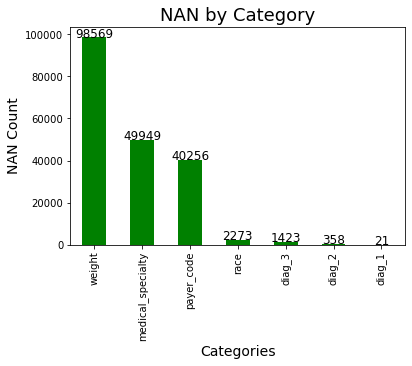

<Figure size 720x1800 with 0 Axes>

In [11]:
#create missing dataframe to build bar graph
missing = imput_df.isna().sum()
missing = pd.DataFrame(missing, columns = ['missing'])
missing = missing[(missing.T !=0).any()]

missing = missing.sort_values('missing', ascending=False)
missing

#create bar graph from missing data
missing.plot(kind = 'bar', legend = False, color='green')
# displaying the title
plt.title("NAN by Category", fontsize=18)
#diplay labels
plt.ylabel('NAN Count', fontsize=14)
plt.xlabel('Categories', fontsize=14)
plt.xticks(rotation='90')
for index,data in enumerate(missing['missing']):
    plt.text(x=index , y =data+2 , s=f"{data}" , fontdict=dict(fontsize=12), ha='center')
plt.figure(figsize=(10, 25))
plt.show

## 3) Imputtation of data
In this section we wil evaluate what to do with the the missing data for these columns;
- __a.__ Weight
- __b.__ Payer_code/medical_speciallty
- __d.__ race
- __e.__ diag_1, 2 and 3

#### 3a) Weight Imputtation
We impute weight data by using age as an indicator. Given we have some domain knowledge and can research valid weight values within specific age ranges, we used that knowledge to substitute missing values with the weight range that has the highest frequency within that range.

In [12]:
imput_df['weight'].unique()

array([nan, '[75-100)', '[50-75)', '[0-25)', '[100-125)', '[25-50)',
       '[125-150)', '[175-200)', '[150-175)', '>200'], dtype=object)

In [13]:
imput_df1 = imput_df.loc[df['weight']=='nan', :]

In [14]:
imput_df1.loc[imput_df['admission_source_id']==11].shape[0]


0

In [15]:
imput_df.loc[(imput_df['age']=='[90-100)') & (imput_df['weight']!='nan'),'weight'].value_counts()


[50-75)     59
[75-100)    24
[25-50)      9
Name: weight, dtype: int64

In [16]:
imput_df.loc[(imput_df['age']=='[10-20)') & (imput_df['weight'].isna()),'weight']='[50-75)'

imput_df.loc[(imput_df['age']=='[0-10)') & (imput_df['weight'].isna()),'weight']='[0-25)'

imput_df.loc[(imput_df['age']=='[20-30)') & (imput_df['weight'].isna()),'weight']='[50-75)'

imput_df.loc[(imput_df['age']=='[30-40)') & (imput_df['weight'].isna()),'weight']='[75-100)'

imput_df.loc[(imput_df['age']=='[40-50)') & (imput_df['weight'].isna()),'weight']='[75-100)'

imput_df.loc[(imput_df['age']=='[50-60)') & (imput_df['weight'].isna()),'weight']='[75-100)'

imput_df.loc[(imput_df['age']=='[60-70)') & (imput_df['weight'].isna()),'weight']='[75-100)'

imput_df.loc[(imput_df['age']=='[70-80)') & (imput_df['weight'].isna()),'weight']='[75-100)'

imput_df.loc[(imput_df['age']=='[80-90)') & (imput_df['weight'].isna()),'weight']='[50-75)'

imput_df.loc[(imput_df['age']=='[90-100)') & (imput_df['weight'].isna()),'weight']='[50-75)'

In [17]:
#check if NAN is still there
imput_df['weight'].unique()

array(['[0-25)', '[50-75)', '[75-100)', '[100-125)', '[25-50)',
       '[125-150)', '[175-200)', '[150-175)', '>200'], dtype=object)

#### 3b) Payer_code/medical_speciallty
Looking at Payer_code and medical_specialiaty we will look at how much data is missing.

In [18]:
imput_df.isnull().sum()/len(df)*100

encounter_id                 0.000000
patient_nbr                  0.000000
race                         2.233555
gender                       0.000000
age                          0.000000
weight                       0.000000
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                  39.557416
medical_specialty           49.082208
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.020636
diag_2                       0.351787
diag_3                       1.398306
number_diagnoses             0.000000
max_glu_serum                0.000000
A1Cresult                    0.000000
metformin                    0.000000
repaglinide                  0.000000
nateglinide 

Given that we have no domanin knowledge and that >40% of the data for the two columns are missing, we will remove the columns for our model.

In [19]:
# removing data columns where more than 30% of the data is missing.
imput_df = imput_df.drop(['weight','payer_code','medical_specialty'], axis = 1)

#### 3c) Race Imputtation
We impute weight data by using age as an indicator. We examine valid weight values within specific age ranges and substitute missing values with the weight range that has the highest frequency within that range.

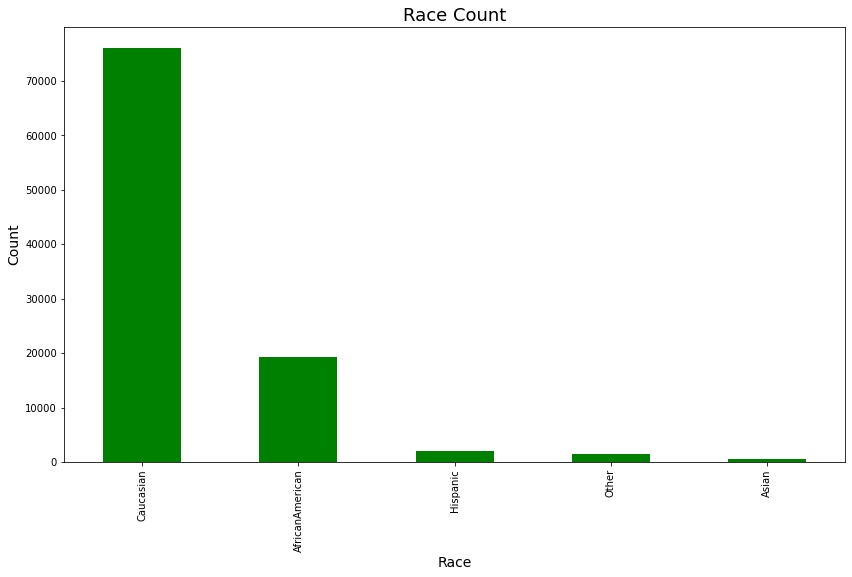

In [20]:
#We will look at is the race column. 
race_graph = imput_df['race'].value_counts().plot(kind='bar',figsize=(14,8), color='green')
# displaying the title
plt.title("Race Count", fontsize=18)
#diplay labels
plt.ylabel('Count', fontsize=14)
plt.xlabel('Race', fontsize=14)
#We will use the mode for the race column 
imput_df['race'] = imput_df['race'].fillna(imput_df['race'].mode()[0])

It stands to reason that older patients, over weight patients, and patients with chronic illness that spend more time in the hospital will have a more likely chance to be readmitted to the hospital.

#### 3c) Diag 1,2 and 3 Imputtation
Given that we have <1.5% of examples without data, given its immateraility, we removed the rows that did not have values

In [21]:
imput_df = imput_df.loc[~imput_df.diag_3.isna()]


In [22]:
imput_df = imput_df.loc[~imput_df.diag_2.isna()]

In [23]:
imput_df = imput_df.loc[~imput_df.diag_1.isna()]

## 3) EDA - Look at ID mapping

One area that we observed was the discharged IDs.
Give that 4 ids are related to death, the likelyhood of readmission is 0 and therefore we remove the row.
###### Discharge IDs
- __11)__ Expired
- __20)__ Expired at home. Medicaid only, hospice.
- __21)__ Expired in a medical facility. Medicaid only, hospice.
- __22)__ Expired, place unknown. Medicaid only, hospice.

In [24]:
#Looking at the IDs_mapping.csv we can see that 11 - Expired ,19,20,21 are related to death or hospice. 
#These samples are removed from the predictive model.
imput_df = imput_df.loc[~imput_df.discharge_disposition_id.isin([11,19,20,21])]

In [25]:
#remove unique identifiers
imput_df = imput_df.drop(['encounter_id','patient_nbr'], axis=1)

In [26]:
imput_df.shape

(100244, 45)

The number of records that were removed was 1,652 rows and 3 columns from the original data set.

## 4) Model LDA
This process will clean the data before proceeding to EDA

In [27]:
#create the target dataframe
y = imput_df['readmitted']

#Change readmittance to numeric - ordinal and remove encounter id and patient number
y = y.replace(to_replace='NO', value=0)
y = y.replace(to_replace='<30', value=1)
y = y.replace(to_replace='>30', value=2)

y

1         2
2         0
3         0
4         0
5         2
         ..
101761    2
101762    0
101763    0
101764    0
101765    0
Name: readmitted, Length: 100244, dtype: int64

In [28]:
#create df for hotcode less the y varaible
imput_df_lessY = imput_df.drop('readmitted', axis=1)

In [29]:
#One Hot Encode Categorical Variables
#https://datagy.io/sklearn-one-hot-encode/
#https://datascience.stackexchange.com/questions/71804/how-to-perform-one-hot-encoding-on-multiple-categorical-columns
#list the caegorical columns less the Y variable
categorical_cols = imput_df_lessY.select_dtypes(exclude=np.number).columns.tolist()
categorical_cols

['race',
 'gender',
 'age',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'diag_1',
 'diag_2',
 'diag_3',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed']

In [30]:
#create one hot code df and create a df_final to be used for the model
X = pd.get_dummies(imput_df_lessY, columns = categorical_cols)
X.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_AfricanAmerican,race_Asian,...,glimepiride-pioglitazone_No,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_No,metformin-rosiglitazone_Steady,metformin-pioglitazone_No,metformin-pioglitazone_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes
1,3,59,0,18,0,0,0,9,0,0,...,1,0,1,0,1,0,1,0,0,1
2,2,11,5,13,2,0,1,6,1,0,...,1,0,1,0,1,0,0,1,0,1
3,2,44,1,16,0,0,0,7,0,0,...,1,0,1,0,1,0,1,0,0,1
4,1,51,0,8,0,0,0,5,0,0,...,1,0,1,0,1,0,1,0,0,1
5,3,31,6,16,0,0,0,9,0,0,...,1,0,1,0,1,0,0,1,0,1


In [31]:
#set the target y .. Then find the priors, % of being readmitted less than 30 days and greater than 30 days (grouping together) and no being opposite
#remove the target from big dataset. 

#use cross validation technique with the priors in mind. 
#Use logistic regression. 

from sklearn.linear_model import LogisticRegression

#Fit Model
lr_model =  LogisticRegression(max_iter = 10000, random_state = 1)
lr_model.fit(X, y)

LogisticRegression(max_iter=10000, random_state=1)

In [32]:
#check accuracy with same data
lr_model.score(X, y)

0.5977714376920314

In [33]:
#find tune model and find the best regularization C for our model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

splits = KFold(n_splits=5,shuffle=True)

best = -1000
alpha = np.logspace(0.1,1,10)
for i in alpha:
    lr_model.C = i
    out = cross_val_score(lr_model,X, y,scoring = 'neg_mean_squared_error', cv = splits, n_jobs=5).mean()
    if out > best:
        best = out
        best_alpha = i
print('Best Alpha:', best_alpha)
print('Best MSE:', best)

Best Alpha: 3.1622776601683795
Best MSE: -1.3279196908316844


In [34]:
#split data for training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True, stratify=y,random_state=1)   

In [50]:
#Create a model with the best hyper parameter for C and look at the accruacy
best_lr = LogisticRegression(C =3.1622776601683795 , max_iter = 10000, random_state = 1)
pred_ncv = best_lr.fit(X_train, y_train) 
pred_ncv.score(X_test,y_test)

0.5801286847224301

In [51]:
from sklearn.model_selection import cross_val_predict
pred = cross_val_predict(best_lr,X_test,y_test, cv=5)

### 4) Results from model
Confusion matrix and fscore to evaluate model accruacy

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred, target_names=['No_Readmission', 'Readmission <30days', 'Readmission +30days']))

                     precision    recall  f1-score   support

     No_Readmission       0.61      0.78      0.69     10764
Readmission <30days       0.25      0.06      0.10      2250
Readmission +30days       0.47      0.39      0.43      7035

           accuracy                           0.56     20049
          macro avg       0.45      0.41      0.41     20049
       weighted avg       0.52      0.56      0.53     20049



<function matplotlib.pyplot.show(close=None, block=None)>

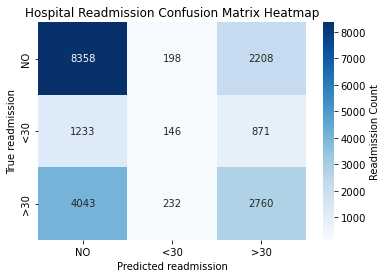

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm0 = confusion_matrix(y_test,pred)
x_axis_labels = ['NO','<30', '>30']
y_axis_labels = ['NO','<30', '>30']
ax = plt.axes()
sns.heatmap(cm0, cmap='Blues', annot=True, fmt='d',xticklabels=x_axis_labels,
            yticklabels=y_axis_labels, ax=ax, cbar_kws={'label': 'Readmission Count',})
ax.set_title('Hospital Readmission Confusion Matrix Heatmap')
plt.xlabel("Predicted readmission")
plt.ylabel("True readmission") 
plt.show

In [54]:
diab_LSR = pd.concat((X,y), axis=1)
diab_LSR = pd.DataFrame(diab_LSR)
diab_LSR.info(1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100244 entries, 1 to 101765
Data columns (total 2408 columns):
 #     Column                           Dtype
---    ------                           -----
 0     time_in_hospital                 int64
 1     num_lab_procedures               int64
 2     num_procedures                   int64
 3     num_medications                  int64
 4     number_outpatient                int64
 5     number_emergency                 int64
 6     number_inpatient                 int64
 7     number_diagnoses                 int64
 8     race_AfricanAmerican             uint8
 9     race_Asian                       uint8
 10    race_Caucasian                   uint8
 11    race_Hispanic                    uint8
 12    race_Other                       uint8
 13    gender_Female                    uint8
 14    gender_Male                      uint8
 15    gender_Unknown/Invalid           uint8
 16    age_[0-10)                       uint8
 17    age_[1

In [55]:
#Feature Importance
feature_names = diab_LSR.drop('readmitted', axis=1).copy().columns.values
feature_importances = pd.DataFrame(pred_ncv.coef_[0],
                                   index = feature_names,
                                  columns=['importance']).sort_values('importance',
                                                                        ascending=False)

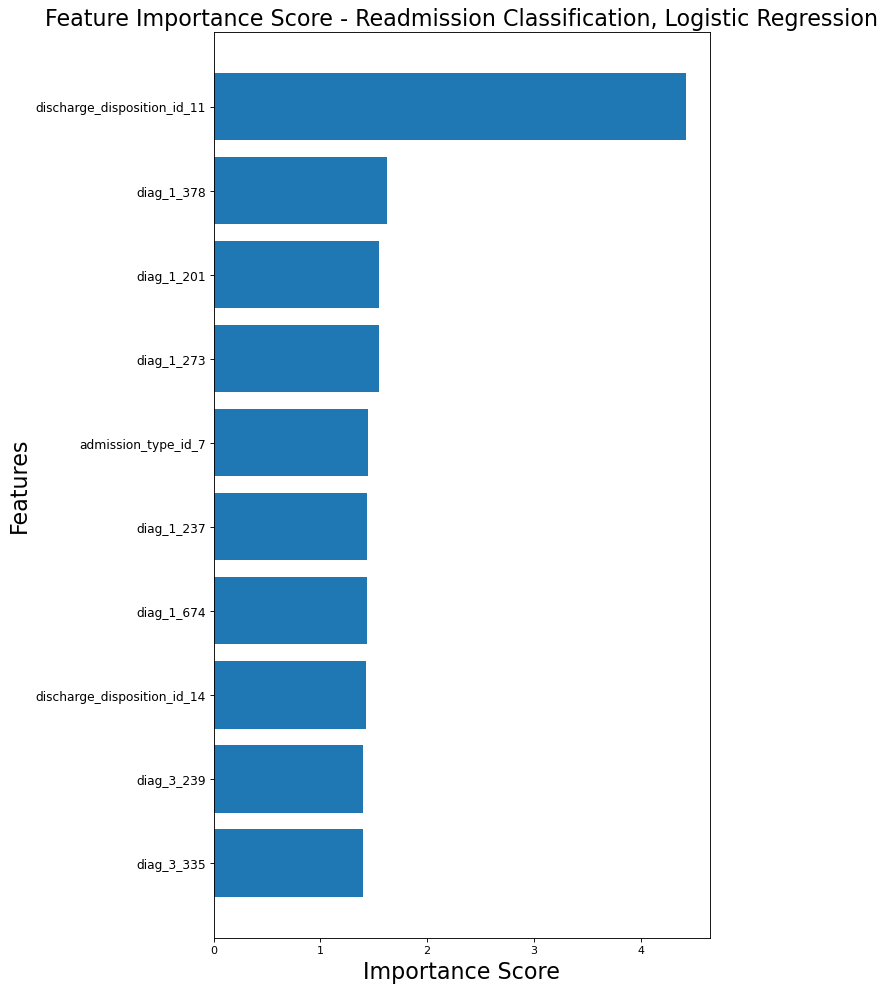

In [56]:
#Feature Importance plot
num = 10
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features', fontsize=20)
plt.xlabel('Importance Score', fontsize=20)
plt.title('Feature Importance Score - Readmission Classification, Logistic Regression', fontsize=20)
plt.yticks(ylocs, feature_labels, fontsize=11)


plt.show()